In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
df.drop(['Loan_ID'],inplace=True,axis=1)

In [35]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

In [37]:
# Checking the type of dataset
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains object, integer and float type of data. We need to encode the Categorical data for futher preprocessing.

In [38]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [39]:
# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [40]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In loan application status dataset we have 614 rows with 13 columns including target variable.
A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
There are three types of datatype dtypes: float64(4), int64(1), object(8)

In [41]:
# Checking the number of unique values in each column
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [42]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

In [43]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# filling null values

In [44]:
#we will replace null value in catagorical col by their mode and numerical col by their median

# Filling the missing values in Gender by its mode "Male"
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode "Yes"
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values in Dependents by its mode 0
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing valuesin Self_Employed by its mode "No"
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing valuesin Gender by its mode "No"
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing valuesin Gender by its mode "360"
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [45]:
# Filling null values in LoanAmount by its median value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [46]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
# Statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed. 

Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.

Since Credit History is Categorical variable there is no significance in different statstical parameter of it.

Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.

Minimum Applicant income is 150 and maximum is 81000.

# Data Visualization

In [48]:
#univariate analysis


Y    422
N    192
Name: Loan_Status, dtype: int64


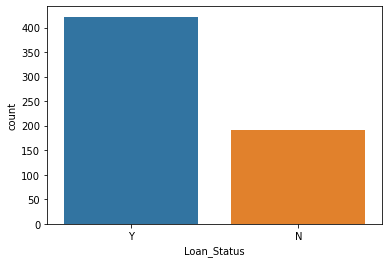

In [49]:
# Visualizing the loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

The count of "Y" is maximum caompare to "N" that means total 422 applicants get their loan and only 192 applicants gets denied.
We can also notice the imbalance of the class, and it needs to get balance using over_sampling method to increase the instances of minority class.

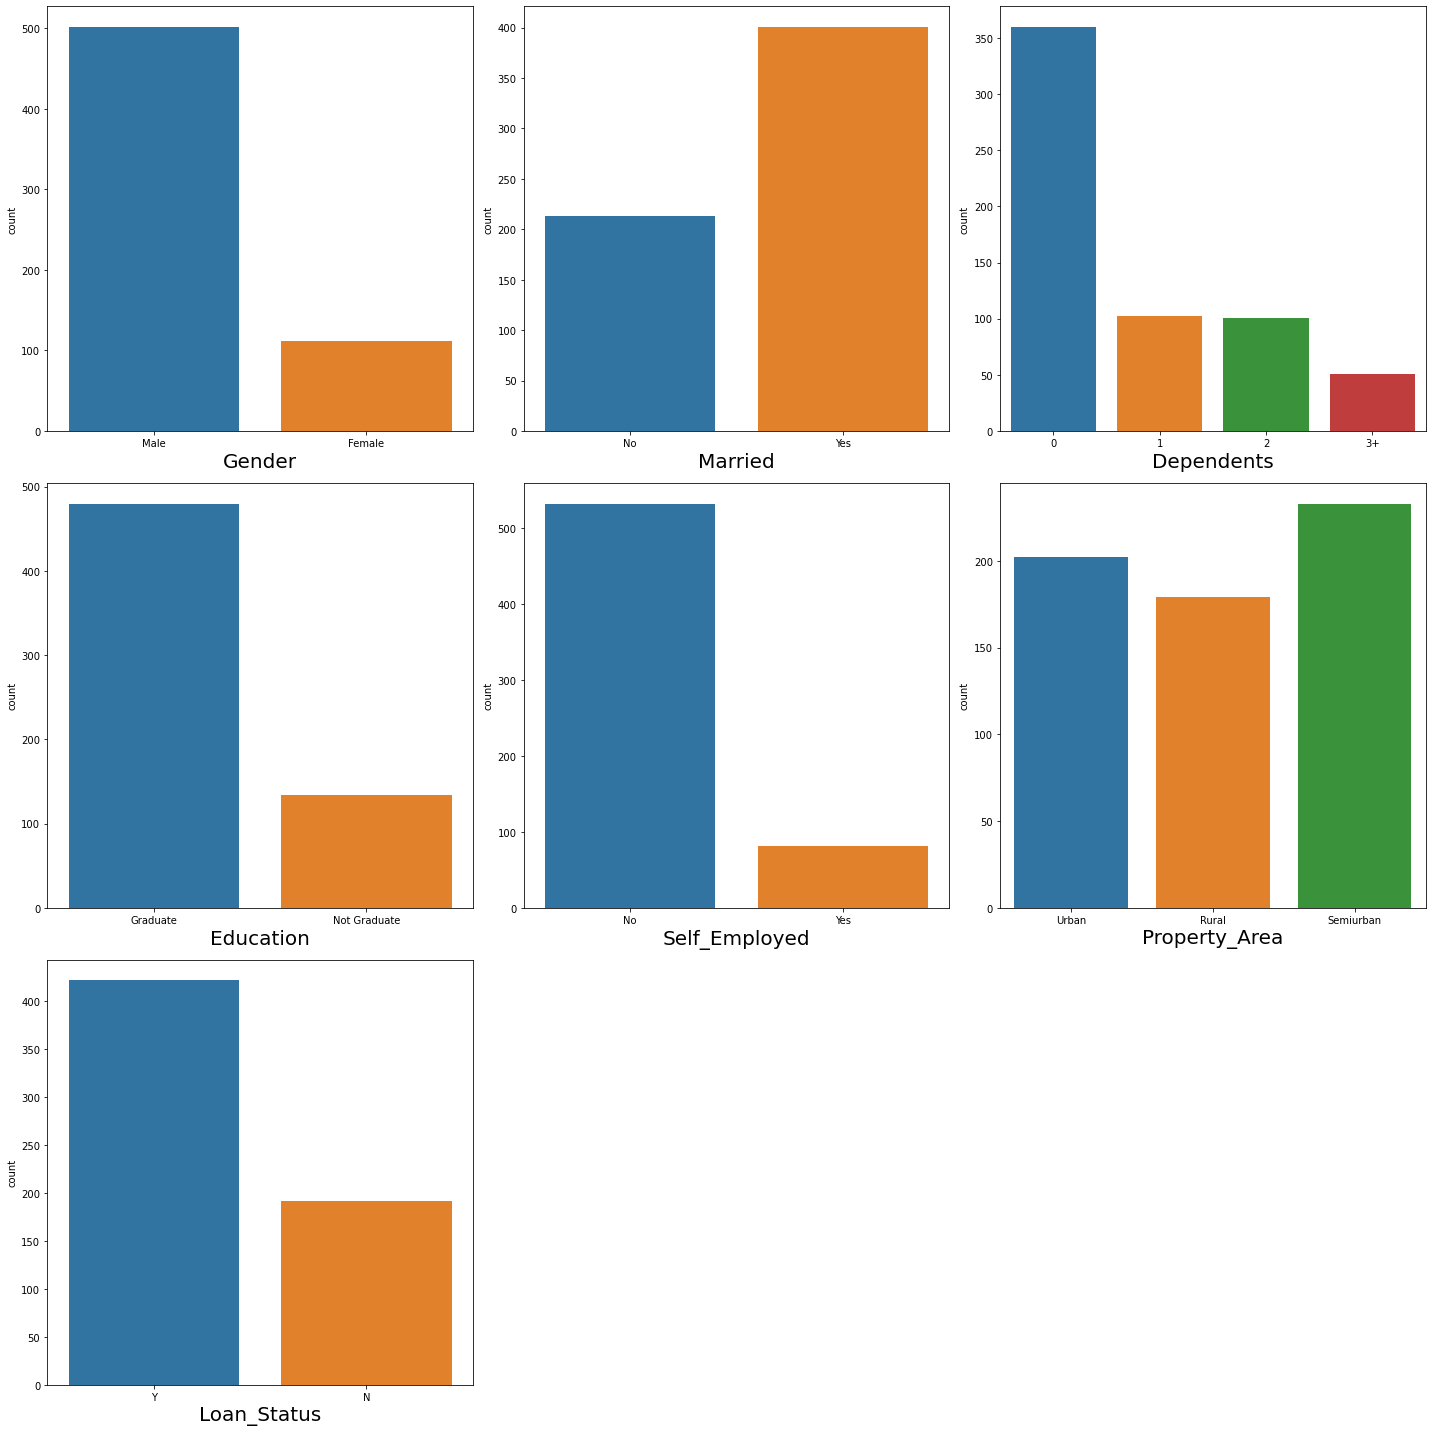

In [50]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in categorical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Comment:
Out of Total loan application max applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?

Only few applicants are self employed. So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.

Nearly 70% are married and 75% of loan applicants are graduates

Almost 60% of the applicants have no dependents.

Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.

80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.

Nearly 70 % applicant gets loan approved.

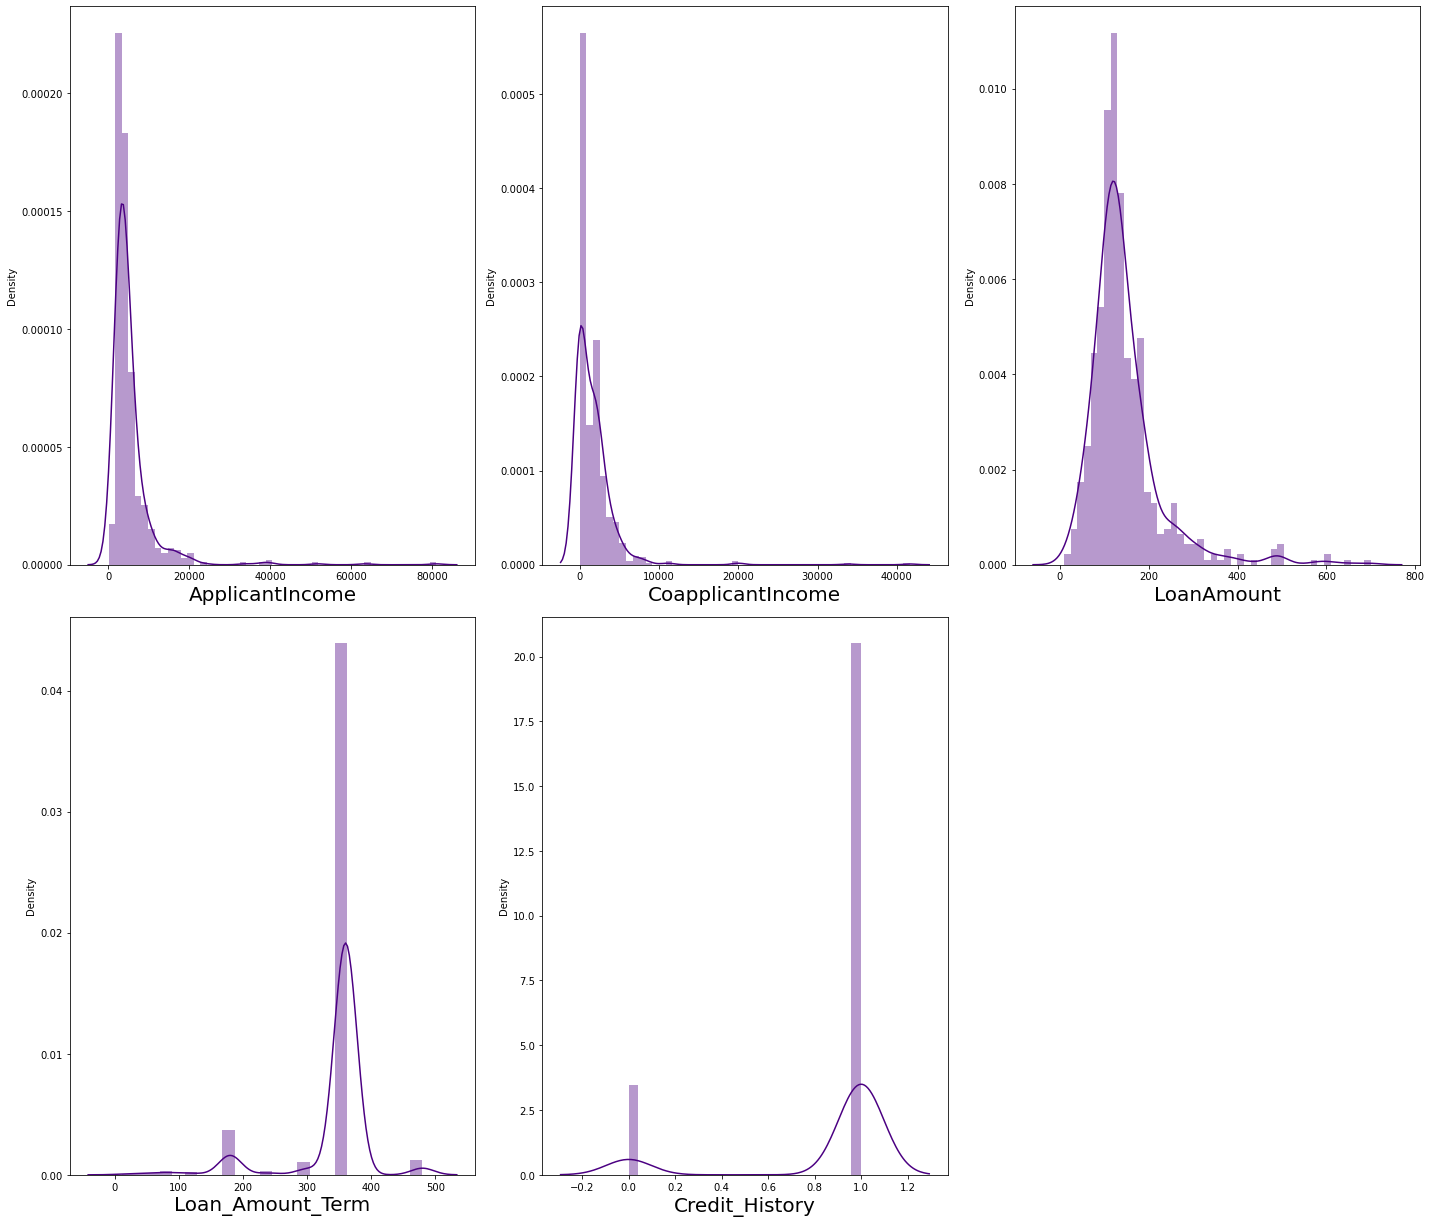

In [51]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data is not normally distributed in any of the columns.

# Bivariate Analysis

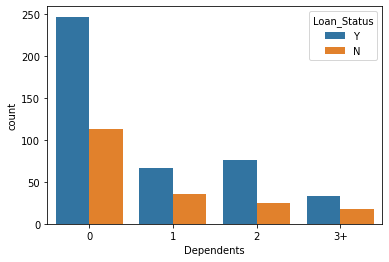

In [52]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

The applicants who have dependents 0 are more likely to get their loan approved.

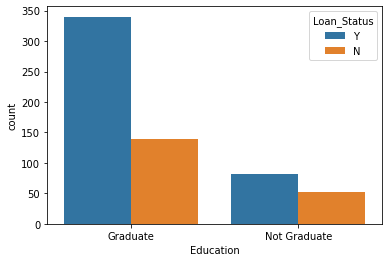

In [53]:
#Visualizing count of Education of the applicants
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Mosrt of the applicants who have applied for loan are graduated and only few are not graduated.
non graduate means the student who havse applied for education but it may have rejected due to income issue
Its clear tha graduate category means who are working and can get a loan approved easyly

No     532
Yes     82
Name: Self_Employed, dtype: int64


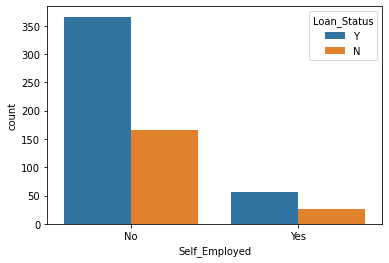

In [54]:
#Visualizing whether the applicants are Self_Employed or not 
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

Most of the applicants are not Self_Employed means they are working in public sectors and only few of the applicants are self_employed.

The applicants who are not self_employed have the tendency of getting thier loans than self employed applicants.

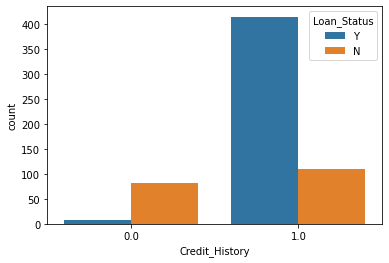

In [55]:
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

The credit_history gives the information of the applicants who took loan in the past have cleared or not. Here we can notice the applicants who have credit history 1 have high counts which means most of the loan applicants have cleared their past loans and only few of them have to clear it.



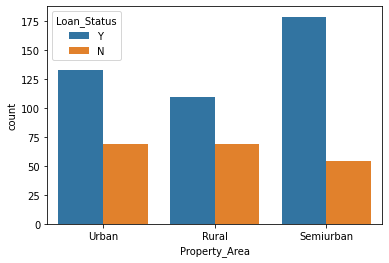

In [56]:
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.show()

Most of the applicants from the Semiurban have applied for loan followed by Urban area. Also they have more chances of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


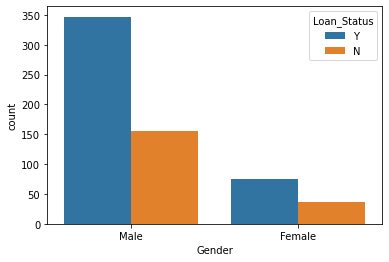

In [57]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

The male applicants are more than female applicants.

Yes    401
No     213
Name: Married, dtype: int64


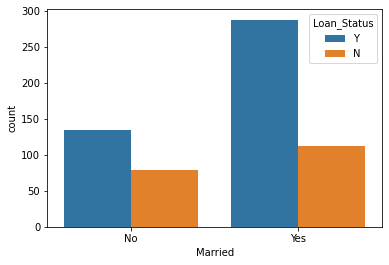

In [58]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"])
plt.show()

The married applicants are more than unmarried applicants.

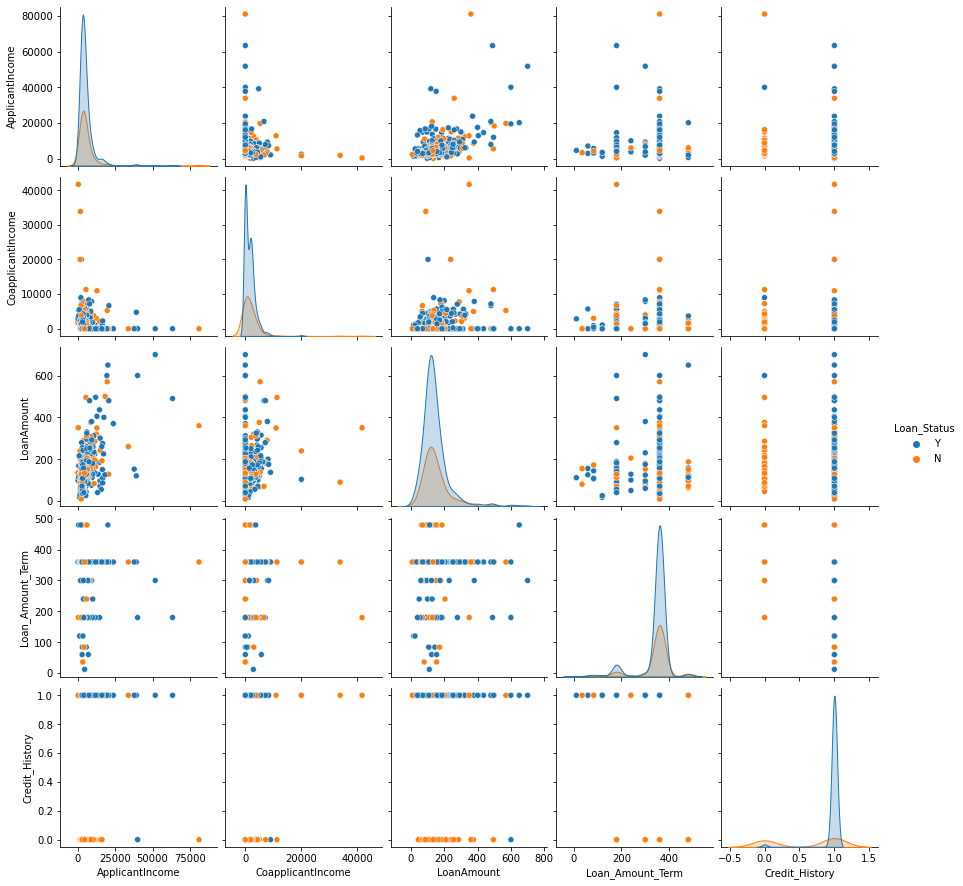

In [59]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

In [60]:
#Encoding categorical data
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


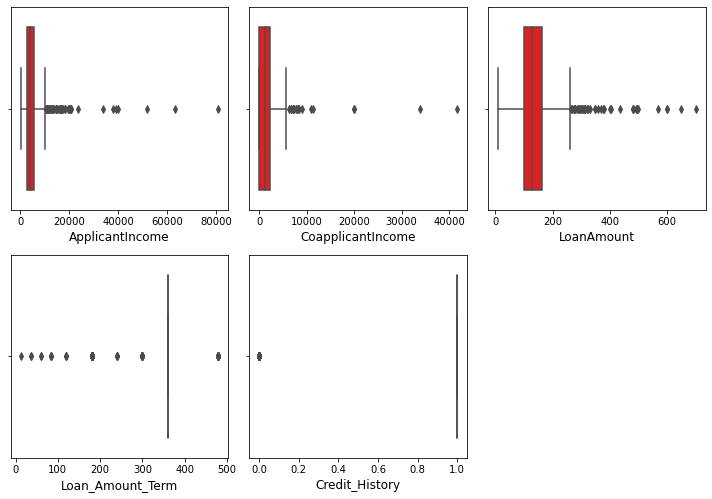

In [62]:
# Identifying the outliers present

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="r")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [68]:
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))


In [69]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [70]:
# Checking hte dimensions of both dataframes
print(df.shape)
print(new_df.shape)

(614, 12)
(577, 12)


In [71]:
# Checking the data loss after removing outliers
loss = (614-577)/614*100
loss

6.026058631921824

data loss is in acceptable range

In [72]:
new_df.skew()

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.

Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.

We will yeo-johnson transformation method.

In [74]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [75]:
# Checking the skewness
new_df.skew()

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

For Numerical variable skewness is within permissible limit.

In [78]:
# Corrleation
new_df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Education,0.045696,0.024817,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936
Property_Area,-0.026340,0.010595,-0.068596,-0.028253,-0.011364,-0.074476,-0.098090,-0.057004,-0.008121,1.000000,0.026507


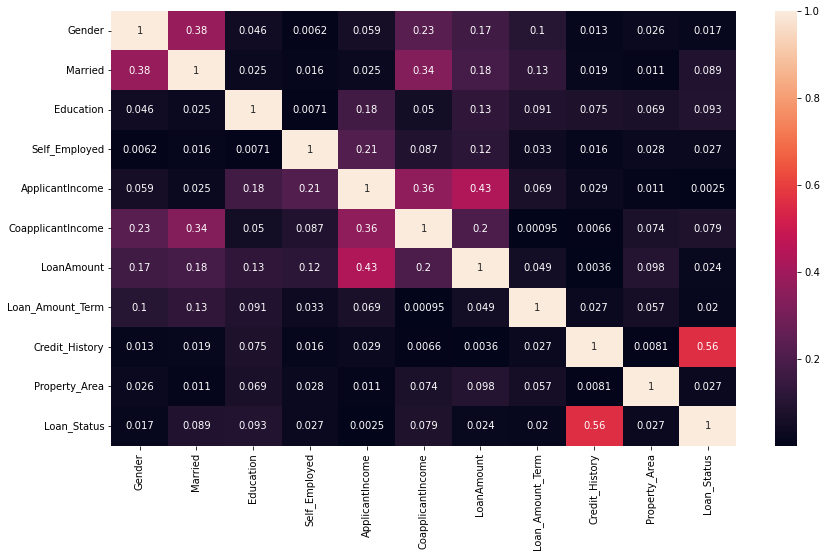

In [79]:
new_df_corr = new_df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(new_df_corr, annot= True)
plt.show()

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other

In [81]:
#Balanceing Imbalanced target feature
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [88]:
from imblearn.over_sampling import SMOTE
# Splitting data in target and dependent feature
x = new_df.drop(['Loan_Status'], axis =1)
y = new_df['Loan_Status']

In [91]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [92]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [93]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(x)

In [94]:
X

array([[ 0.49174147, -1.21012243, -0.68543678, ...,  0.21146846,
         0.56610583,  1.25260661],
       [ 0.49174147,  0.82636267,  0.34401167, ...,  0.21146846,
         0.56610583, -1.26844235],
       [ 0.49174147,  0.82636267, -0.68543678, ...,  0.21146846,
         0.56610583,  1.25260661],
       ...,
       [ 0.49174147,  0.82636267, -0.68543678, ...,  0.21146846,
        -1.91909918,  1.25260661],
       [-2.03358891, -1.21012243, -0.68543678, ...,  0.21146846,
        -1.91909918, -0.00791787],
       [ 0.49174147, -1.21012243, -0.68543678, ...,  0.21146846,
         0.56610583,  1.25260661]])

# Machine Learning Model Building

In [95]:
#Finding the best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," at Random_state ",maxRS)

Best accuracy is  0.8577405857740585  at Random_state  8


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [98]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('Acuracy score is- ' ,  accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Acuracy score is-  0.7740585774058577
[[ 78  52]
 [  2 107]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       130
           1       0.67      0.98      0.80       109

    accuracy                           0.77       239
   macro avg       0.82      0.79      0.77       239
weighted avg       0.84      0.77      0.77       239



In [99]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8619246861924686
[[105  25]
 [  8 101]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       130
           1       0.80      0.93      0.86       109

    accuracy                           0.86       239
   macro avg       0.87      0.87      0.86       239
weighted avg       0.87      0.86      0.86       239



In [100]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7405857740585774
[[97 33]
 [29 80]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       130
           1       0.71      0.73      0.72       109

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



In [101]:
svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.7573221757322176
[[ 77  53]
 [  5 104]]
              precision    recall  f1-score   support

           0       0.94      0.59      0.73       130
           1       0.66      0.95      0.78       109

    accuracy                           0.76       239
   macro avg       0.80      0.77      0.75       239
weighted avg       0.81      0.76      0.75       239



In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test, predgb))

0.7907949790794979
[[ 84  46]
 [  4 105]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       130
           1       0.70      0.96      0.81       109

    accuracy                           0.79       239
   macro avg       0.82      0.80      0.79       239
weighted avg       0.84      0.79      0.79       239



# Checking for cross validation score

In [104]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,X,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.7337264150943396


In [105]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.8217216981132076


In [106]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.7526493710691824


In [107]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.5175943396226415


In [108]:
# Checking cross validation score of GradientBoostingClassifier:

scr = cross_val_score(gb,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.7927987421383648


so from the above training we can conclude that random forest classifier is our best model due to high accuacy and cross validation score

# Hyper Parameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [111]:
GCV = GridSearchCV(RandomForestClassifier(),parameter)
GCV.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [112]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 70}

In [114]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=60 ,max_features='auto')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8661087866108786


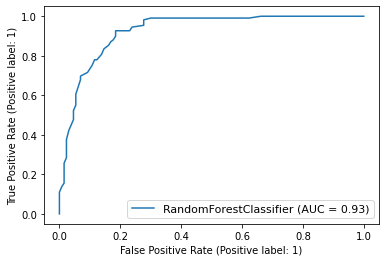

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8709950599858857


In [115]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, Final_mod.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [116]:
import joblib
joblib.dump(Final_mod,'Loan_Status.pkl')

['Loan_Status.pkl']